<a href="https://colab.research.google.com/github/maani20/hores-or-human/blob/main/horse_or_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/horse-or-human/test'
test_dir = '/content/drive/MyDrive/horse-or-human/train'

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/horse-or-human/test/horses')))
print(len(os.listdir('/content/drive/MyDrive/horse-or-human/test/humans')))
print(len(os.listdir('/content/drive/MyDrive/horse-or-human/train/horses')))
print(len(os.listdir('/content/drive/MyDrive/horse-or-human/train/humans')))


500
527
500
527


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 193s 7s/step - accuracy: 0.5979 - loss: 1.0835 - val_accuracy: 0.9122 - val_loss: 0.2092
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.9563 - loss: 0.1167 - val_accuracy: 0.9659 - val_loss: 0.0730
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.9933 - loss: 0.0197 - val_accuracy: 0.9415 - val_loss: 0.1856
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.9959 - loss: 0.0078 - val_accuracy: 0.8732 - val_loss: 0.4953
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 149s 6s/step - accuracy: 0.9954 - loss: 0.0140 - val_accuracy: 0.8829 - val_loss: 0.3244
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.9374 - loss: 0.1834 - val_accuracy: 0.8195 - val_loss: 0.6437
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.9776 - loss: 0.0571 - val_accuracy: 0.9512 - val_loss: 0.1635
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.9873 - loss: 0.0598 - val_accuracy: 0.9073 - v

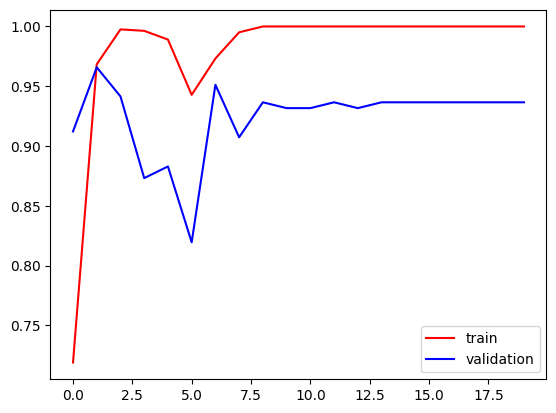

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

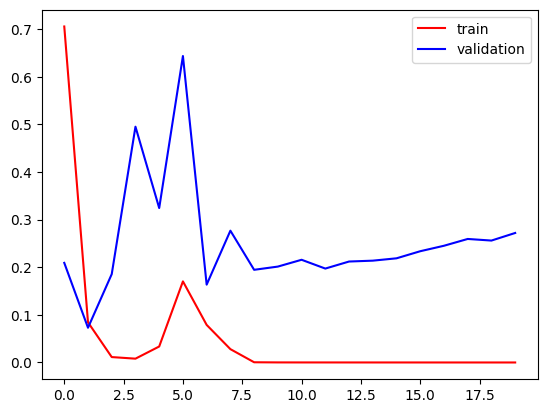

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[247 253]
 [266 261]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.49      0.49       500
           1       0.51      0.50      0.50       527

    accuracy                           0.49      1027
   macro avg       0.49      0.49      0.49      1027
weighted avg       0.49      0.49      0.49      1027



In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 235s 9s/step - accuracy: 0.8428 - loss: 3.2874 - val_accuracy: 0.5122 - val_loss: 15.5873
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 209s 8s/step - accuracy: 0.9778 - loss: 0.3570 - val_accuracy: 0.5122 - val_loss: 20.9606
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 208s 8s/step - accuracy: 0.9895 - loss: 0.1833 - val_accuracy: 0.5122 - val_loss: 46.1482
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 216s 8s/step - accuracy: 0.9832 - loss: 0.3657 - val_accuracy: 0.5122 - val_loss: 39.6578
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 261s 8s/step - accuracy: 0.9872 - loss: 0.2923 - val_accuracy: 0.4878 - val_loss: 38.4750
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 216s 8s/step - accuracy: 0.9957 - loss: 0.0841 - val_accuracy: 0.6976 - val_loss: 3.7831
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 209s 8s/step - accuracy: 0.9931 - loss: 0.0724 - val_accuracy: 0.5122 - val_loss: 52.5599
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 207s 8s/step - accuracy: 0.9929 - loss: 0.3735 - val_accuracy: 0.63

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[263 237]
 [277 250]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.49      0.53      0.51       500
           1       0.51      0.47      0.49       527

    accuracy                           0.50      1027
   macro avg       0.50      0.50      0.50      1027
weighted avg       0.50      0.50      0.50      1027



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 268s 10s/step - accuracy: 0.5358 - loss: 1.7368 - val_accuracy: 0.5366 - val_loss: 2.3242
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 255s 10s/step - accuracy: 0.7011 - loss: 0.9504 - val_accuracy: 0.5610 - val_loss: 1.5246
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 286s 11s/step - accuracy: 0.8359 - loss: 0.3804 - val_accuracy: 0.6829 - val_loss: 0.5901
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 290s 10s/step - accuracy: 0.9046 - loss: 0.2260 - val_accuracy: 0.8829 - val_loss: 0.3266
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 254s 10s/step - accuracy: 0.8924 - loss: 0.2525 - val_accuracy: 0.7659 - val_loss: 0.3721
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 287s 11s/step - accuracy: 0.9405 - loss: 0.1699 - val_accuracy: 0.5610 - val_loss: 0.9477
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 255s 10s/step - accuracy: 0.9153 - loss: 0.2083 - val_accuracy: 0.7366 - val_loss: 0.5574
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 255s 10s/step - accuracy: 0.9704 - loss: 0.1384 - val_accuracy: 0.

In [ ]:
predictions = resnet_model.predict(test_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 265s 8s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[259 241]
 [312 215]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.45      0.52      0.48       500
           1       0.47      0.41      0.44       527

    accuracy                           0.46      1027
   macro avg       0.46      0.46      0.46      1027
weighted avg       0.46      0.46      0.46      1027

